### Урок 6. ДЗ ###

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [38]:
def trees_errors_dep(max_n_trees, max_depth, eta):
    
    train_errors_list = []
    test_errors_list = []
    depth_list = []

    for i in range(1, max_depth+1):

        trees, train_errors, test_errors = gb_fit(max_n_trees, i, X_train, X_test, y_train, y_test, eta)
        train_errors_list.append(train_errors[-1])
        test_errors_list.append(test_errors[-1])
        depth_list.append(i)

    return train_errors_list, test_errors_list, depth_list

In [59]:
max_n_trees = 3
max_depth = 5
eta = 1

train_errors_list, test_errors_list, depth_list = trees_errors_dep(max_n_trees, max_depth, eta)

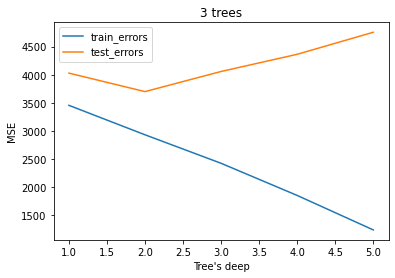

In [60]:
plt.plot(depth_list, train_errors_list, label='train_errors')
plt.plot(depth_list, test_errors_list, label='test_errors')
plt.title(f'{max_n_trees} trees')
plt.xlabel('Tree\'s deep')
plt.ylabel('MSE')
plt.legend()

In [61]:
max_n_trees = 9
max_depth = 5
eta = 1

train_errors_list, test_errors_list, depth_list = trees_errors_dep(max_n_trees, max_depth, eta)

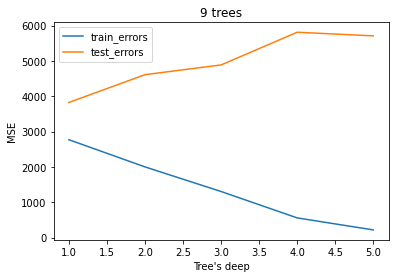

In [62]:
plt.plot(depth_list, train_errors_list, label='train_errors')
plt.plot(depth_list, test_errors_list, label='test_errors')
plt.title(f'{max_n_trees} trees')
plt.xlabel('Tree\'s deep')
plt.ylabel('MSE')
plt.legend()

In [63]:
max_n_trees = 15
max_depth = 5
eta = 1

train_errors_list, test_errors_list, depth_list = trees_errors_dep(max_n_trees, max_depth, eta)

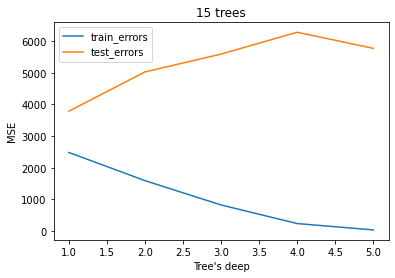

In [64]:
plt.plot(depth_list, train_errors_list, label='train_errors')
plt.plot(depth_list, test_errors_list, label='test_errors')
plt.title(f'{max_n_trees} trees')
plt.xlabel('Tree\'s deep')
plt.ylabel('MSE')
plt.legend()

In [65]:
# ОТВЕТ: При большем количестве деревьев, и растущей глубине, скорость переобучения будет выше